F-score: 0.65
True Positive Rate (TPR): 0.70
False Positive Rate (FPR): 0.41


Text(0.5, 0, 'Image histogram peak location value 0-255')

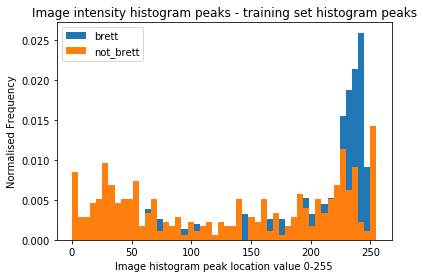

In [1]:
'''
Steve Winnall 10 Aug 2019
This code is work toward the Udacity Machine Learning NanoDegree Capstone Project
"The Art Thief - Is this a Whiteley?"
Using machine learning to identify a "fake" Brett Whiteley paiting.

Compare the histograms of the peak for the training data images (intensity histograms) belonging 
to the Whiteley and non-Whiteley classes
'''

#imports
import cv2 
import glob
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline

#initialise variables
image = []
image_not = []
peak_list_not = list()
peak_list = list()
threshold = 180

#for the images in the not-Whiteley class, calculate the histograms for the images, identify the histogram peak location 
for filename in glob.glob('data/train/not_brett/*.jpg'):  
    image_not = cv2.imread(filename,0)
    
    #Compute histogram
    hist_not = cv2.calcHist([image_not], [0], None, [256], [0, 256])

    #Convert histogram to simple list
    hist_not = [val[0] for val in hist_not]; 

    #Generate a list of indices
    indices = list(range(0, 256));

    #Descending sort-by-key with histogram value as key
    snot = [(x,y) for y,x in sorted(zip(hist_not,indices), reverse=True)]

    #Index of highest peak in histogram
    index_first_peak_not = snot[0][0];
    peak_list_not = np.append(peak_list_not, index_first_peak_not)

#for the images in the Whiteley class, calculate the histograms for the images, identify the histogram peak location 
for filename in glob.glob('data/train/brett/*.jpg'):  
    image = cv2.imread(filename,0)
    
    #Compute histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    #Convert histogram to simple list
    hist = [val[0] for val in hist]; 

    #Generate a list of indices
    indices = list(range(0, 256));

    #Descending sort-by-key with histogram value as key
    s = [(x,y) for y,x in sorted(zip(hist,indices), reverse=True)]

    #Index of highest peak in histogram
    index_first_peak = s[0][0];
    peak_list = np.append(peak_list, index_first_peak)

#calculate and print the F-score
normaliser_peak_list = len(peak_list) + len(peak_list_not)
#/ normaliser_peak_list

true_positives = sum(i > threshold for i in peak_list)  / normaliser_peak_list
true_negatives = sum(i < threshold for i in peak_list_not)  / normaliser_peak_list

false_positives = sum(i > threshold for i in peak_list_not)  / normaliser_peak_list
false_negatives = sum(i < threshold for i in peak_list)  / normaliser_peak_list

Fscore = (2*true_positives)/(2*true_positives + false_positives + false_negatives)

TPR = true_positives / (true_positives + false_negatives)
FPR = false_positives / (false_positives + true_negatives)

print("F-score: {:.2f}".format(Fscore))
print("True Positive Rate (TPR): {:.2f}".format(TPR))
print("False Positive Rate (FPR): {:.2f}".format(FPR))

#plotting of histograms
plt.hist(peak_list, 50, density=True, label = 'brett')
plt.hist(peak_list_not, 50, density=True, label = 'not_brett')
plt.legend(loc='upper left')
plt.title('Image intensity histogram peaks - training set histogram peaks')
plt.ylabel('Normalised Frequency')
plt.xlabel('Image histogram peak location value 0-255')